In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stockpricedata/Y_test.csv
/kaggle/input/stockpricedata/X_test.csv
/kaggle/input/stockpricedata/Y_train.csv
/kaggle/input/stockpricedata/X_train.csv


In [2]:
from numpy import loadtxt
X_test = loadtxt('../input/stockpricedata/X_test.csv', delimiter=',')
print(f"X_test -- {X_test.shape}")
X_train = loadtxt('../input/stockpricedata/X_train.csv', delimiter=',')
print(f"X_train -- {X_train.shape}")
Y_test = loadtxt('../input/stockpricedata/Y_test.csv', delimiter=',')
print(f"Y_test -- {Y_test.shape}")
Y_train = loadtxt('../input/stockpricedata/Y_train.csv', delimiter=',')
print(f"Y_train -- {Y_train.shape}")

X_test -- (306, 100)
X_train -- (724, 100)
Y_test -- (306,)
Y_train -- (724,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(f"X_train -- {X_train.shape}")
print(f"X_test -- {X_test.shape}")

X_train -- (724, 100, 1)
X_test -- (306, 100, 1)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 312ms/step - loss: 0.2043 - val_loss: 0.0131
Epoch 2/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0191 - val_loss: 0.0346
Epoch 3/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0130 - val_loss: 0.0144
Epoch 4/100
12/12 [==============================] - 2s 183ms/step - loss: 0.0086 - val_loss: 0.0180
Epoch 5/100
12/12 [==============================] - 2s 186ms/step - loss: 0.0069 - val_loss: 0.0120
Epoch 6/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0058 - val_loss: 0.0072
Epoch 7/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 8/100
12/12 [==============================] - 2s 181ms/step - loss: 0.0053 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 2s 184ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 10/100
12/12 [==============================] - 2s 185ms/step - loss: 0.0040 - val_lo

In [6]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [13]:
X = loadtxt('../input/originaldatastockbob/original.csv', delimiter=',')
print(f"Original -- {X.shape}")


Original -- (1232,)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
obj = scaler.fit(np.array(X).reshape(-1,1))
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [16]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

0.029008684337278885

In [17]:
math.sqrt(mean_squared_error(Y_test,test_predict))

0.023138421792463996

In [18]:
X = scaler.fit_transform(np.array(X).reshape(-1,1))

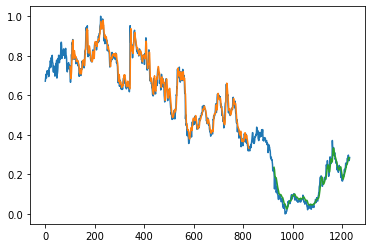

In [21]:
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(X)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
len(test_data)

NameError: name 'test_data' is not defined